In [69]:
import numpy as np

In [70]:
import pandas as pd

In [71]:
import matplotlib.pyplot as plt

In [72]:
%matplotlib inline

In [73]:
import seaborn as sns

In [74]:
from sklearn.model_selection import train_test_split

In [150]:
from sklearn.preprocessing import StandardScaler

In [164]:
import torch

In [166]:
import torch.nn as nn

In [76]:
# Load the data 
df = pd.read_csv('data.csv')

In [77]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [78]:
df['date'] = pd.to_datetime(df['date'])

In [79]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [80]:
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day

In [81]:
df.drop('date',axis=1,inplace=True)

In [82]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Year,Month,Day
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5,2
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2014,5,2
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5,2
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5,2
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5,2


<Axes: >

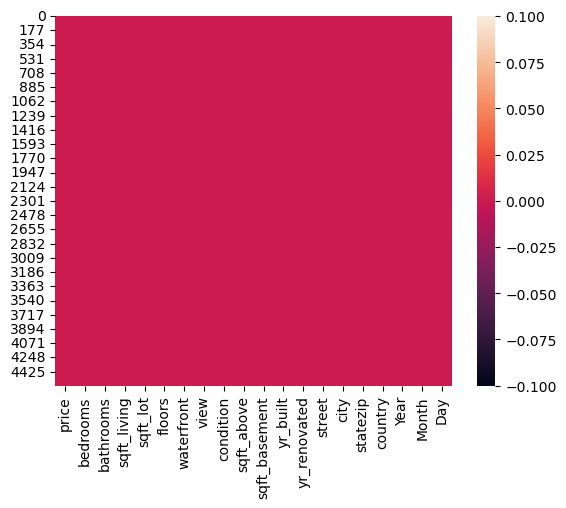

In [83]:
sns.heatmap(df.isnull())

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
 17  Year           4600 non-null   int64  
 18  Month   

In [85]:
avg_price_per_year = df.groupby('Year')['price'].mean().reset_index()

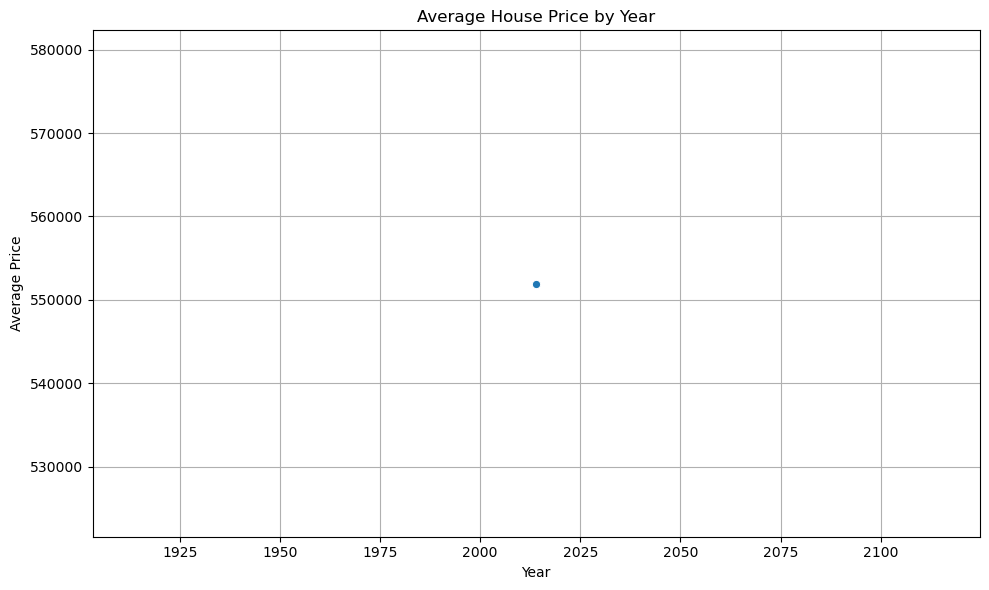

In [86]:
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_price_per_year,x='Year',y='price', marker='o')
plt.title('Average House Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [119]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country',
       'Year', 'Month', 'Day'],
      dtype='object')

In [127]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated']]


In [125]:
y = df['price']

In [132]:
X.values

array([[3.000e+00, 1.500e+00, 1.340e+03, ..., 0.000e+00, 1.955e+03,
        2.005e+03],
       [5.000e+00, 2.500e+00, 3.650e+03, ..., 2.800e+02, 1.921e+03,
        0.000e+00],
       [3.000e+00, 2.000e+00, 1.930e+03, ..., 0.000e+00, 1.966e+03,
        0.000e+00],
       ...,
       [3.000e+00, 2.500e+00, 3.010e+03, ..., 0.000e+00, 2.009e+03,
        0.000e+00],
       [4.000e+00, 2.000e+00, 2.090e+03, ..., 1.020e+03, 1.974e+03,
        0.000e+00],
       [3.000e+00, 2.500e+00, 1.490e+03, ..., 0.000e+00, 1.990e+03,
        0.000e+00]])

In [136]:
X.shape

(4600, 12)

In [138]:
y.shape

(4600,)

In [142]:
y = y.values.reshape(-1, 1)

In [146]:
y.shape

(4600, 1)

In [148]:
#Scale Features
scaler_x = StandardScaler() 
scaler_y = StandardScaler()

x_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

In [156]:
# Convert to PyTorch tensors
X_tensor = torch.tensor(x_scaled,dtype=torch.float32)
y_tensor = torch.tensor(y_scaled,dtype=torch.float32)

In [158]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.33, random_state=42)

In [168]:
#Define Linear Regression Model
model = nn.Linear(X_train.shape[1],1)

In [172]:
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [174]:
##Training Loop
epochs = 500
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output,y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 50==0:
        print(f'epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

epoch [50/500], Loss: 0.2611
epoch [100/500], Loss: 0.2243
epoch [150/500], Loss: 0.2144
epoch [200/500], Loss: 0.2110
epoch [250/500], Loss: 0.2098
epoch [300/500], Loss: 0.2093
epoch [350/500], Loss: 0.2091
epoch [400/500], Loss: 0.2091
epoch [450/500], Loss: 0.2090
epoch [500/500], Loss: 0.2090


In [176]:
#Evaluate on test data:
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    test_loss = criterion(predictions,y_test)
    print(f'\nTest Loss(MSE): {test_loss.item():.4f}')


Test Loss(MSE): 1.9548


In [180]:
#Convert predicgtions back to original Price scale
predictions_org = scaler_y.inverse_transform(predictions.numpy())
y_test_orign  = scaler_y.inverse_transform(y_test.numpy())

In [184]:
print("\nExample Predictions vs Actual Prediction")
for i in range(5):
    print(f'Predicted: Rs{predictions_org[i][0]:,.0f} | Actual: Rs{y_test_orign[i][0]:,.0f}')


Example Predictions vs Actual Prediction
Predicted: Rs297,140 | Actual: Rs544,000
Predicted: Rs322,178 | Actual: Rs-0
Predicted: Rs1,068,117 | Actual: Rs1,712,500
Predicted: Rs549,504 | Actual: Rs365,000
Predicted: Rs370,450 | Actual: Rs275,000
